# Introduction

This notebook aims to build a CNN model for Flower Classification with the hepl of Flower-Dataset using
 - **Simple CNN model**
 - **CNN with Data Agumentation and Dropout**
 - **Transfer Learning(MobileNet_V2)**
 


## Importing Library

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import PIL
import tensorflow as tf
import pathlib
import glob
import cv2

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split



The input provided to the notebook is present in  as given structure(file directories)
- /kaggle/input/flower-photos-by-the-tensorflow-team/
    - flower_photos
        - /tulips
        - /daisy
        - /dandelion
        - /roses
        - /sunflowers

## Loading Dataset

In [3]:
main_dir = '/kaggle/input/flower-photos-by-the-tensorflow-team/flower_photos/'
data_dir = pathlib.Path(main_dir).with_suffix('')
image_cnt = len(list(data_dir.glob('*/*.jpg')))
print('Total images Present: ',image_cnt)

Total images Present:  3670


## Visualizing Dataset

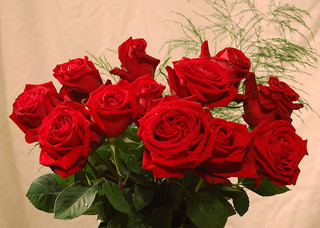

In [5]:
#visualinzing some images
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[1]))

In [6]:
#creating dataset
batch_size = 32
img_height = 180
img_width = 180

In [4]:
data_dir = {
    'tulips':list(data_dir.glob('tulips/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'roses':list(data_dir.glob('roses/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*'))
}

In [5]:
class_labels = {
    'tulips':0,
    'daisy':1,
    'dandelion':2,
    'roses':3,
    'sunflowers':4
}

In [9]:
#checking for class imbalancing
for flower in data_dir.keys():
    print(f'Number of {flower} images  : {len(data_dir[flower])}' )

Number of tulips images  : 799
Number of daisy images  : 633
Number of dandelion images  : 898
Number of roses images  : 641
Number of sunflowers images  : 699


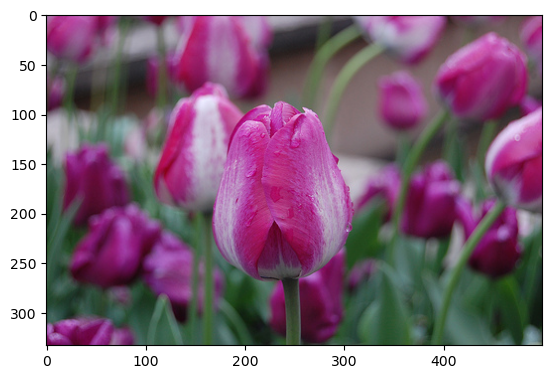

In [10]:
img = PIL.Image.open(data_dir['tulips'][1])
img = np.asarray(img)
plt.imshow(img.astype('uint8'))

<Figure size 1000x1000 with 0 Axes>

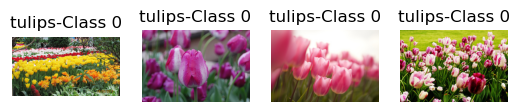

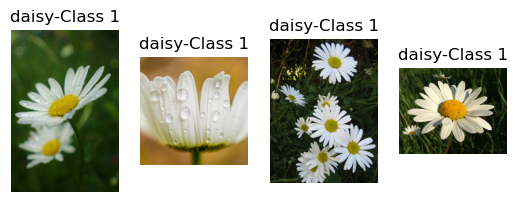

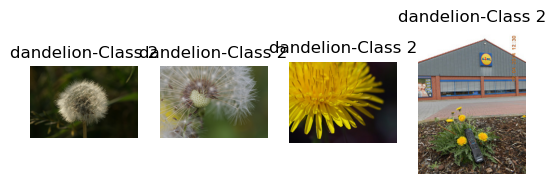

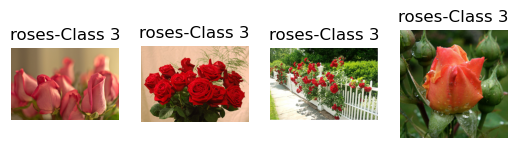

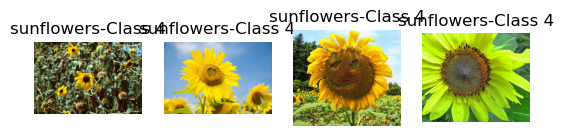

In [11]:
plt.figure(figsize = (10,10))
for flower in data_dir.keys():
    plt.figure()
    for i in range(4):
        axis = plt.subplot(1,4,i+1)
        img = np.asarray(PIL.Image.open(data_dir[flower][i]))
        plt.imshow(img.astype('uint8'))
        plt.title(f'{flower}-Class {class_labels[flower]}')
        plt.axis('off')
        

## Spliting into X and Y

In [12]:
#creating X and y dataset
X=[]
y=[]

for flower, images in data_dir.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(class_labels[flower])


In [13]:
len(X) , len(y)

(3670, 3670)

In [14]:
X = np.array(X)
y = np.array(y)

## Train-Test Split

In [15]:
#train-test-split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)

In [16]:
X_train.shape

(2752, 180, 180, 3)

In [17]:
X_test.shape

(918, 180, 180, 3)

## Preprocessing image(Scaling)

In [18]:
#scaling the images
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [19]:
X_train_scaled[1]

array([[[0.3254902 , 0.33333333, 0.37647059],
        [0.74901961, 0.7254902 , 0.78823529],
        [0.55294118, 0.57254902, 0.66666667],
        ...,
        [0.92941176, 0.83137255, 0.84705882],
        [0.9372549 , 0.85098039, 0.87058824],
        [0.93333333, 0.82745098, 0.85882353]],

       [[0.31764706, 0.3254902 , 0.36862745],
        [0.76862745, 0.74117647, 0.80784314],
        [0.58823529, 0.6       , 0.69411765],
        ...,
        [0.90980392, 0.81176471, 0.83137255],
        [0.90980392, 0.84313725, 0.84313725],
        [0.9254902 , 0.84313725, 0.84313725]],

       [[0.31764706, 0.32156863, 0.36470588],
        [0.78823529, 0.75686275, 0.82352941],
        [0.61568627, 0.61960784, 0.71764706],
        ...,
        [0.90980392, 0.80392157, 0.82745098],
        [0.90588235, 0.83137255, 0.83921569],
        [0.92156863, 0.83921569, 0.84313725]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

# Simple CNN model

In [20]:
#Building simple CNN
num_classes = 5
model = Sequential([
    #cnn model
    layers.Conv2D(8,3,padding = 'same',activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,3,padding = 'same',activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding = 'same',activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding = 'same',activation = 'relu'),
    layers.MaxPooling2D(),
    
    #dense model
    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy'])
model.fit(X_train_scaled,y_train, epochs = 30)

Epoch 1/30
86/86 [==============================] - 12s 15ms/step - loss: 1.4962 - accuracy: 0.3190
Epoch 2/30
86/86 [==============================] - 1s 14ms/step - loss: 1.1943 - accuracy: 0.5033
Epoch 3/30
86/86 [==============================] - 1s 14ms/step - loss: 1.0037 - accuracy: 0.5970
Epoch 4/30
86/86 [==============================] - 1s 14ms/step - loss: 0.8877 - accuracy: 0.6490
Epoch 5/30
86/86 [==============================] - 1s 14ms/step - loss: 0.7843 - accuracy: 0.7009
Epoch 6/30
86/86 [==============================] - 1s 14ms/step - loss: 0.6785 - accuracy: 0.7333
Epoch 7/30
86/86 [==============================] - 1s 14ms/step - loss: 0.5622 - accuracy: 0.7871
Epoch 8/30
86/86 [==============================] - 1s 14ms/step - loss: 0.4522 - accuracy: 0.8408
Epoch 9/30
86/86 [==============================] - 1s 14ms/step - loss: 0.3454 - accuracy: 0.8699
Epoch 10/30
86/86 [==============================] - 1s 14ms/step - loss: 0.2453 - accuracy: 0.9172
Epoch 11

In [21]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 16ms/step - loss: 3.2865 - accuracy: 0.6601


[3.286461591720581, 0.6601307392120361]

**We can observed that after 30 epoch the model accuracy on training data was amlost more than 100% but on test data the accuracy is very poor i.e 65.90% so The model is higly overfitting**

In [22]:
simple_cnn_predict = model.predict(X_test_scaled)

29/29 [==============================] - 0s 9ms/step


## Prediction using Simple CNN model

In [23]:
#predicting some image
for i in range(20):
    print('Image No.',i)
    score = tf.nn.softmax(simple_cnn_predict[i])
    index = np.argmax(score)
    actual = y_test[i]
    print(f'  Actual image class : {list(class_labels.keys())[actual]}')
    print(f'  Model predicted    : {list(class_labels.keys())[index]}')

Image No. 0
  Actual image class : tulips
  Model predicted    : tulips
Image No. 1
  Actual image class : roses
  Model predicted    : daisy
Image No. 2
  Actual image class : sunflowers
  Model predicted    : sunflowers
Image No. 3
  Actual image class : daisy
  Model predicted    : daisy
Image No. 4
  Actual image class : daisy
  Model predicted    : roses
Image No. 5
  Actual image class : dandelion
  Model predicted    : dandelion
Image No. 6
  Actual image class : dandelion
  Model predicted    : dandelion
Image No. 7
  Actual image class : tulips
  Model predicted    : dandelion
Image No. 8
  Actual image class : daisy
  Model predicted    : daisy
Image No. 9
  Actual image class : tulips
  Model predicted    : tulips
Image No. 10
  Actual image class : tulips
  Model predicted    : tulips
Image No. 11
  Actual image class : dandelion
  Model predicted    : dandelion
Image No. 12
  Actual image class : dandelion
  Model predicted    : dandelion
Image No. 13
  Actual image class 

# CNN with Data Agumentation and Droput

In [24]:
#performing data agumentation

data_agumentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal',
                                                input_shape = (img_height,img_width,3)),
    layers.experimental.preprocessing.RandomContrast(0.2),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

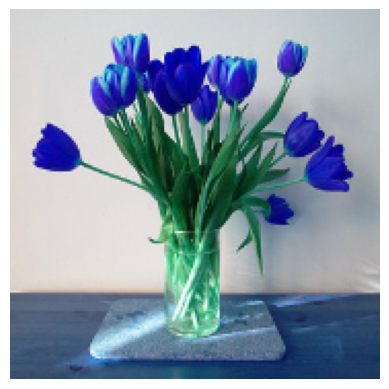

In [25]:
#plotting the original image
plt.axis('off')
plt.imshow(X[20])


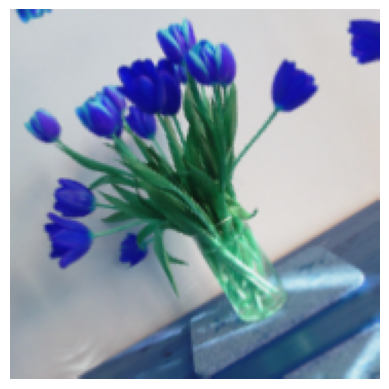

In [26]:
#after agumentation
plt.axis('off')
plt.imshow(data_agumentation(X)[20].numpy().astype('uint8'))

In [27]:
#training model with agumentation

num_classes = 5

model1 = Sequential([
    data_agumentation,
     #cnn model
    layers.Conv2D(8,3,padding = 'same',activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,3,padding = 'same',activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding = 'same',activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding = 'same',activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    #dense model
    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(num_classes)
    
])

model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model1.fit(X_train_scaled, y_train, epochs = 40)

Epoch 1/40


2023-07-22 10:03:15.104452: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


86/86 [==============================] - 4s 21ms/step - loss: 1.4265 - accuracy: 0.3663
Epoch 2/40
86/86 [==============================] - 2s 19ms/step - loss: 1.1023 - accuracy: 0.5382
Epoch 3/40
86/86 [==============================] - 2s 25ms/step - loss: 0.9957 - accuracy: 0.6097
Epoch 4/40
86/86 [==============================] - 2s 20ms/step - loss: 0.9309 - accuracy: 0.6243
Epoch 5/40
86/86 [==============================] - 2s 19ms/step - loss: 0.9095 - accuracy: 0.6479
Epoch 6/40
86/86 [==============================] - 2s 20ms/step - loss: 0.8538 - accuracy: 0.6675
Epoch 7/40
86/86 [==============================] - 2s 19ms/step - loss: 0.8097 - accuracy: 0.6835
Epoch 8/40
86/86 [==============================] - 2s 20ms/step - loss: 0.7861 - accuracy: 0.7053
Epoch 9/40
86/86 [==============================] - 2s 20ms/step - loss: 0.7469 - accuracy: 0.7184
Epoch 10/40
86/86 [==============================] - 2s 20ms/step - loss: 0.7105 - accuracy: 0.7347
Epoch 11/40
86/86 [=

In [28]:
#predicting some image
cnn_aggumented_predict = model1.predict(X_test_scaled)

29/29 [==============================] - 0s 9ms/step


In [29]:
#predicting some image
print('Model Prediction with data agumentation')
for i in range(20):
    print('Image No.',i)
    score = tf.nn.softmax(cnn_aggumented_predict[i])
    index = np.argmax(score)
    actual = y_test[i]
    print(f'  Actual image class : {list(class_labels.keys())[actual]}')
    print(f'  Model predicted    : {list(class_labels.keys())[index]}')

Model Prediction with data agumentation
Image No. 0
  Actual image class : tulips
  Model predicted    : tulips
Image No. 1
  Actual image class : roses
  Model predicted    : tulips
Image No. 2
  Actual image class : sunflowers
  Model predicted    : sunflowers
Image No. 3
  Actual image class : daisy
  Model predicted    : daisy
Image No. 4
  Actual image class : daisy
  Model predicted    : daisy
Image No. 5
  Actual image class : dandelion
  Model predicted    : dandelion
Image No. 6
  Actual image class : dandelion
  Model predicted    : sunflowers
Image No. 7
  Actual image class : tulips
  Model predicted    : dandelion
Image No. 8
  Actual image class : daisy
  Model predicted    : daisy
Image No. 9
  Actual image class : tulips
  Model predicted    : tulips
Image No. 10
  Actual image class : tulips
  Model predicted    : tulips
Image No. 11
  Actual image class : dandelion
  Model predicted    : dandelion
Image No. 12
  Actual image class : dandelion
  Model predicted    : da

In [30]:
model1.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 0s 10ms/step - loss: 0.8831 - accuracy: 0.7549


[0.883145809173584, 0.7549019455909729]

**By using data agumentation and dropout layer  , the accuracy increase upto 75.90%**

# Transfer Learning(MobileNet_V2) model

In [6]:
#creating X and y dataset
X_new=[]
y_new=[]
for flower, images in data_dir.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X_new.append(resized_img)
        y_new.append(class_labels[flower])



In [7]:
X_new = np.array(X_new)
y_new = np.array(y_new)

X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,random_state = 42)

X_train_scaled = X_train/ 255.0
X_test_scaled = X_test/255.0

In [8]:
import tensorflow_hub as hub
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

IMAGE_SHAPE = (224,224)

pretrained_without_top_layer_model = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [9]:
num_of_flowers = 5

model2 = tf.keras.Sequential([
  pretrained_without_top_layer_model,
  tf.keras.layers.Dense(num_of_flowers)
])

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [10]:
model2.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model2.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 18s 39ms/step - loss: 0.7733 - acc: 0.7115
Epoch 2/10
86/86 [==============================] - 3s 39ms/step - loss: 0.4088 - acc: 0.8619
Epoch 3/10
86/86 [==============================] - 3s 40ms/step - loss: 0.3255 - acc: 0.8910
Epoch 4/10
86/86 [==============================] - 3s 38ms/step - loss: 0.2718 - acc: 0.9088
Epoch 5/10
86/86 [==============================] - 3s 38ms/step - loss: 0.2328 - acc: 0.9281
Epoch 6/10
86/86 [==============================] - 3s 38ms/step - loss: 0.2055 - acc: 0.9415
Epoch 7/10
86/86 [==============================] - 3s 38ms/step - loss: 0.1825 - acc: 0.9524
Epoch 8/10
86/86 [==============================] - 3s 39ms/step - loss: 0.1658 - acc: 0.9568
Epoch 9/10
86/86 [==============================] - 3s 38ms/step - loss: 0.1461 - acc: 0.9637
Epoch 10/10
86/86 [==============================] - 3s 38ms/step - loss: 0.1358 - acc: 0.9680


In [11]:
model2.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 3s 60ms/step - loss: 0.3349 - acc: 0.8900


[0.3349498212337494, 0.8899782299995422]